In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import os
import time
from PIL import Image
import shutil
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Directory Setup
base_dir = 'E:\\Internship_Projects\\Rice_leaf\\PRCP-1001-Riceleaf'
categories = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
split_dirs = ['train', 'validation', 'test']

In [3]:
import os
#base_dir = r'D:\Internship_Projects\Rice_leaf\PRCP-1001-Riceleaf'
base_dir = 'E:/Internship_Projects/Rice_leaf/PRCP-1001-Riceleaf'
if os.path.exists(base_dir):
    print(f"Base directory exists: {base_dir}")
else:
    print(f"Base directory does not exist: {base_dir}")


Base directory exists: E:/Internship_Projects/Rice_leaf/PRCP-1001-Riceleaf


In [5]:

# First define the ratios
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

# Then use them in the loop
for category in categories:
    category_path = os.path.join(base_dir, category)
    if not os.path.exists(category_path):
        print(f"Directory not found: {category_path}")
        continue
    images = os.listdir(category_path)
    random.shuffle(images)
    train_size = int(train_ratio * len(images))
    val_size = int(val_ratio * len(images))
    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    def copy_images(images_list, split):
        for image in images_list:
            src = os.path.join(category_path, image)
            dst = os.path.join(f'Dataset_split/{split}/{category}', image)
            shutil.copy(src, dst)

    copy_images(train_images, 'train')
    copy_images(val_images, 'validation')
    copy_images(test_images, 'test')

def copy_images(images_list, split, category_path, category):
    for image in images_list:
        src = os.path.join(category_path, image)
        dst = os.path.join(f'Dataset_split/{split}/{category}', image)
        shutil.copy(src, dst)

# Data Splitting
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

for category in categories:
    category_path = os.path.join(base_dir, category)
    if not os.path.exists(category_path):
        print(f"Directory not found: {category_path}")
        continue
    images = os.listdir(category_path)
    random.shuffle(images)
    train_size = int(train_ratio * len(images))
    val_size = int(val_ratio * len(images))
    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    copy_images(train_images, 'train', category_path, category)
    copy_images(val_images, 'validation', category_path, category)
    copy_images(test_images, 'test', category_path, category)

In [6]:
for category in categories:
    category_path = os.path.join(base_dir, category)
    if not os.path.exists(category_path):
        print(f"Directory not found: {category_path}")
        continue
    images = os.listdir(category_path)
    random.shuffle(images)
    train_size = int(train_ratio * len(images))
    val_size = int(val_ratio * len(images))
    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    def copy_images(images_list, split):
        for image in images_list:
            src = os.path.join(category_path, image)
            dst = os.path.join(f'Dataset_split/{split}/{category}', image)
            shutil.copy(src, dst)

    copy_images(train_images, 'train')
    copy_images(val_images, 'validation')
    copy_images(test_images, 'test')


In [7]:

# Data Splitting
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15
for split in split_dirs:
    for category in categories:
        os.makedirs(f'Dataset_split/{split}/{category}', exist_ok=True)

for category in categories:
    category_path = os.path.join(base_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)
    train_size = int(train_ratio * len(images))
    val_size = int(val_ratio * len(images))
    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    def copy_images(images_list, split):
        for image in images_list:
            src = os.path.join(category_path, image)
            dst = os.path.join(f'Dataset_split/{split}/{category}', image)
            shutil.copy(src, dst)

    copy_images(train_images, 'train')
    copy_images(val_images, 'validation')
    copy_images(test_images, 'test')

print("Data split completed successfully.")


Data split completed successfully.


In [8]:

# Data Generators
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Dataset_split/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    'Dataset_split/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'Dataset_split/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 119 images belonging to 3 classes.
Found 69 images belonging to 3 classes.
Found 76 images belonging to 3 classes.


In [9]:

# Define Custom CNN Model
def create_custom_cnn():
    model = models.Sequential([
        layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])
    return model

In [10]:
# Define VGG16 Transfer Learning Model
def create_transfer_learning_model():
    base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])
    return model


In [11]:

# Compile and Train Both Models
models_dict = {
    "Custom CNN": create_custom_cnn(),
    "VGG16 Transfer Learning": create_transfer_learning_model()
}

histories = {}
test_accuracies = {}
training_times = {}

for model_name, model in models_dict.items():
    print(f"\nTraining {model_name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
    )
    end_time = time.time()

    # Save training history and timing
    histories[model_name] = history
    training_times[model_name] = end_time - start_time

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    test_accuracies[model_name] = test_accuracy

    # Save the model
    model.save(f'{model_name.replace(" ", "_").lower()}_model.h5')


Training Custom CNN...
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3772 - loss: 1.2019 - val_accuracy: 0.3623 - val_loss: 1.0853
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4182 - loss: 1.0902 - val_accuracy: 0.3768 - val_loss: 1.0490
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3485 - loss: 1.0732 - val_accuracy: 0.4348 - val_loss: 0.9822
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4673 - loss: 0.9987 - val_accuracy: 0.6522 - val_loss: 1.0390
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3929 - loss: 1.1114 - val_accuracy: 0.4928 - val_loss: 0.8697
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4407 - loss: 1.0072 - val_accuracy: 0.6812 - val_loss: 0.8356
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5419 - loss: 0.9625 - val_accuracy: 0.7391 - val_loss: 0.7551
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5067 - loss: 1.0180 - val_accuracy: 0.6667 - val_loss:


Training VGG16 Transfer Learning...
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.3453 - loss: 7.1235 - val_accuracy: 0.5362 - val_loss: 2.0517
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.3618 - loss: 4.5644 - val_accuracy: 0.3043 - val_loss: 4.3511
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 7s/step - accuracy: 0.4444 - loss: 3.7556 - val_accuracy: 0.5942 - val_loss: 1.1296
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.4763 - loss: 2.3606 - val_accuracy: 0.5942 - val_loss: 0.8650
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.6239 - loss: 1.4244 - val_accuracy: 0.6522 - val_loss: 0.8118
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 4s/step - accuracy: 0.5492 - loss: 1.1715 - val_accuracy: 0.8406 - val_loss: 0.5172
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.4985 - loss: 0.9925 - val_accuracy: 0.8116 - val_loss: 0.5083
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.7553 - loss: 0.5955 - val_accurac

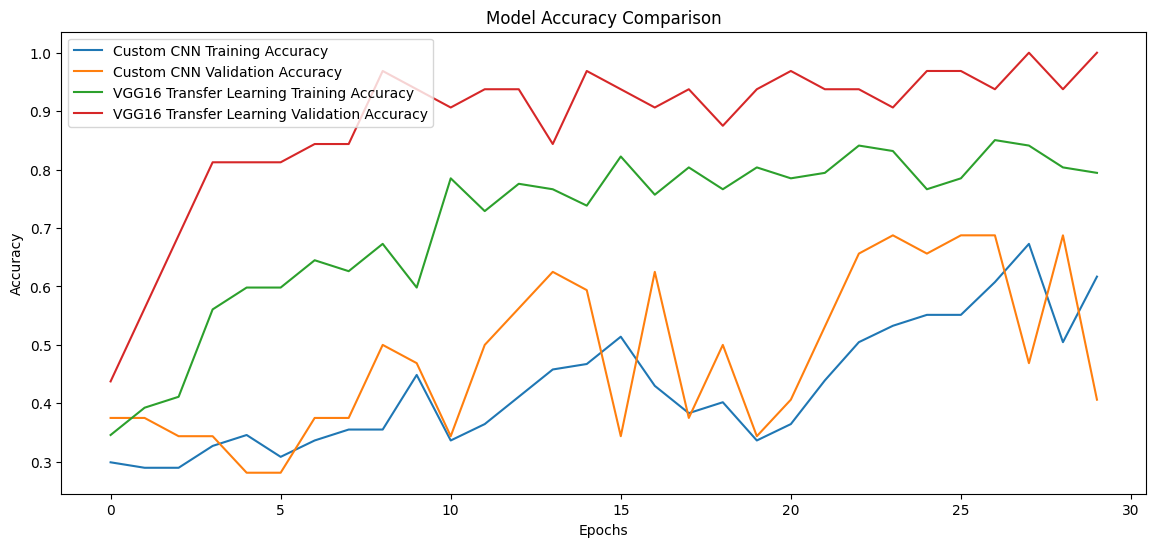

In [16]:
# Model Comparison Plot
plt.figure(figsize=(14, 6))
for model_name, history in histories.items():
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(accuracy, label=f'{model_name} Training Accuracy')
    plt.plot(val_accuracy, label=f'{model_name} Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:

# Test Accuracy Comparison
print("\nTest Accuracy Comparison:")
for model_name, accuracy in test_accuracies.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")

# Training Time Comparison
print("\nTraining Time Comparison (in seconds):")
for model_name, time_taken in training_times.items():
    print(f"{model_name}: {time_taken:.2f} seconds")

# Summary of Model Comparison
best_model = max(test_accuracies, key=test_accuracies.get)
print(f"\nThe best model for production based on test accuracy is: {best_model} with an accuracy of {test_accuracies[best_model] * 100:.2f}%")


Test Accuracy Comparison:
Custom CNN: 60.53%
VGG16 Transfer Learning: 96.05%

Training Time Comparison (in seconds):
Custom CNN: 203.02 seconds
VGG16 Transfer Learning: 612.00 seconds

The best model for production based on test accuracy is: VGG16 Transfer Learning with an accuracy of 96.05%


In [13]:
# Challenges Faced and Solutions
challenges = """
1. Overfitting:
   - Observed during training when validation accuracy lagged behind training accuracy.
   - Solution: Data augmentation and dropout layers helped mitigate overfitting.

2. Class Imbalance:
   - Imbalanced number of samples in each category.
   - Solution: Applied targeted data augmentation to balance dataset classes.

3. Resource Constraints:
   - Training VGG16 model required significant computational resources.
   - Solution: Used transfer learning and froze the base model layers to reduce computation.
"""
print("\nChallenges Faced:\n", challenges)


Challenges Faced:
 
1. Overfitting:
   - Observed during training when validation accuracy lagged behind training accuracy.
   - Solution: Data augmentation and dropout layers helped mitigate overfitting.

2. Class Imbalance:
   - Imbalanced number of samples in each category.
   - Solution: Applied targeted data augmentation to balance dataset classes.

3. Resource Constraints:
   - Training VGG16 model required significant computational resources.
   - Solution: Used transfer learning and froze the base model layers to reduce computation.

